# Stress Detection Using ML

In [1]:
import numpy as np
import pandas as pd

### Reading the Dataset

In [2]:
df = pd.read_csv('data/merged.csv', index_col=0)
df.head(4)

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,0.029937,0.009942,0.000000,0.087383,0.029510,0.011145,-0.024082,0.087383,0.000020,0.000008,...,27,175,80,0,1,0,0,1,0,0
1,0.021986,0.015845,0.000000,0.071558,0.017352,0.020817,-0.037843,0.071558,0.000012,0.000014,...,27,175,80,0,1,0,0,1,0,0
2,0.020839,0.011034,0.002752,0.054356,0.020839,0.011034,0.002752,0.054356,0.000014,0.000008,...,27,175,80,0,1,0,0,1,0,0
3,0.034449,0.003185,0.013761,0.040595,0.034449,0.003185,0.013761,0.040595,0.000024,0.000002,...,27,175,80,0,1,0,0,1,0,0


In [3]:
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max', 'ACC_y_mean',
       'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean', 'ACC_z_std',
       'ACC_z_min', 'ACC_z_max', 'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
       'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'EDA_phasic_mean',
       'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean',
       'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean',
       'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean', 'TEMP_std', 'TEMP_min',
       'TEMP_max', 'BVP_peak_freq', 'TEMP_slope', 'subject', 'label', 'age',
       'height', 'weight', 'gender_ female', 'gender_ male',
       'coffee_today_YES', 'sport_today_YES', 'smoker_NO', 'smoker_YES',
       'feel_ill_today_YES'],
      dtype='object')

In [4]:
np.unique(df['label'])

array([0, 1, 2], dtype=int64)

In [5]:
labels = {
    0: "Amused",
    1: "Neutral",
    2: "Stressed"
}

### Feature Selection

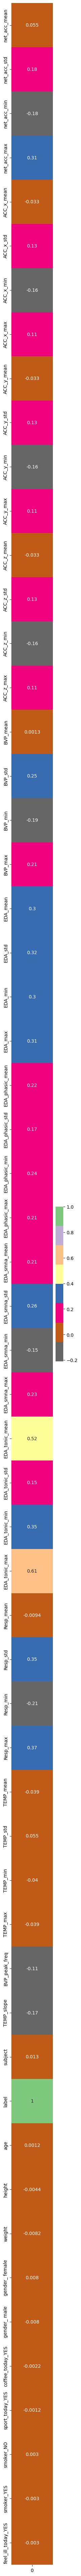

In [6]:
# nbconvert_remove

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2,100))
cor = df.corr()
n_targets = len(df.columns)
cor_target = cor['label'].values.reshape(n_targets, 1)
cor_features = cor['label'].keys()
ax = sns.heatmap(cor_target, annot=True, cmap=plt.cm.Accent_r)
ax.set_yticklabels(cor_features)
plt.show()

In [7]:
selected_feats =   [
    'BVP_mean', 'BVP_std', 'EDA_phasic_mean', 'EDA_phasic_min', 'EDA_smna_min', 
    'EDA_tonic_mean', 'Resp_mean', 'Resp_std', 'TEMP_mean', 'TEMP_std', 'TEMP_slope',
    'BVP_peak_freq', 'age', 'height', 'weight'
    ]

X = df[selected_feats]
y = df['label']

X.shape, y.shape

((1178, 15), (1178,))

## ML Model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [9]:
X_train, X_test = train_test_split(X, test_size=0.1, random_state=0)
y_train, y_test = train_test_split(y, test_size=0.1, random_state=0)

X_train.shape, X_test.shape

((1060, 15), (118, 15))

In [10]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
def accuracy(predicted, actual):
    n = 0
    for p, a in zip(predicted, actual):
        if p == a:
            n += 1
    return n/len(predicted) * 100

In [12]:
def predict(arr):
    arr = np.array(arr)

    global model
    result = model.predict(arr.reshape(1,-1)).flatten()
    # _prob = model.predict_proba(arr.reshape(1,-1)).flatten()
    return result

In [13]:
predicted = []
for data in X_test.values:
    predicted.append(predict(data))
predicted

accuracy(predicted, y_test.values)

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with f

93.22033898305084

### Saving the trained model in a pickle file to be later used by the API function to predict

In [14]:
import pickle

filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))